In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd

In [11]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("data/diabetes.csv", header=None, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = df[["pregnant","glucose","bp","skin", "insulin", "bmi", "pedigree", "age"]]
y = df["label"]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
random_state=1, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [74]:
tree = DecisionTreeClassifier(max_depth=5)
# tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.get_depth()

5

In [75]:
y_hat = tree.predict(X_test)
# print(y_test)
# print(y_hat)
print(y_hat.shape)

(192,)


In [76]:
print("Accuracy:", metrics.accuracy_score(y_test, y_hat))

Accuracy: 0.7760416666666666


In [77]:
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[108  17]
 [ 26  41]]


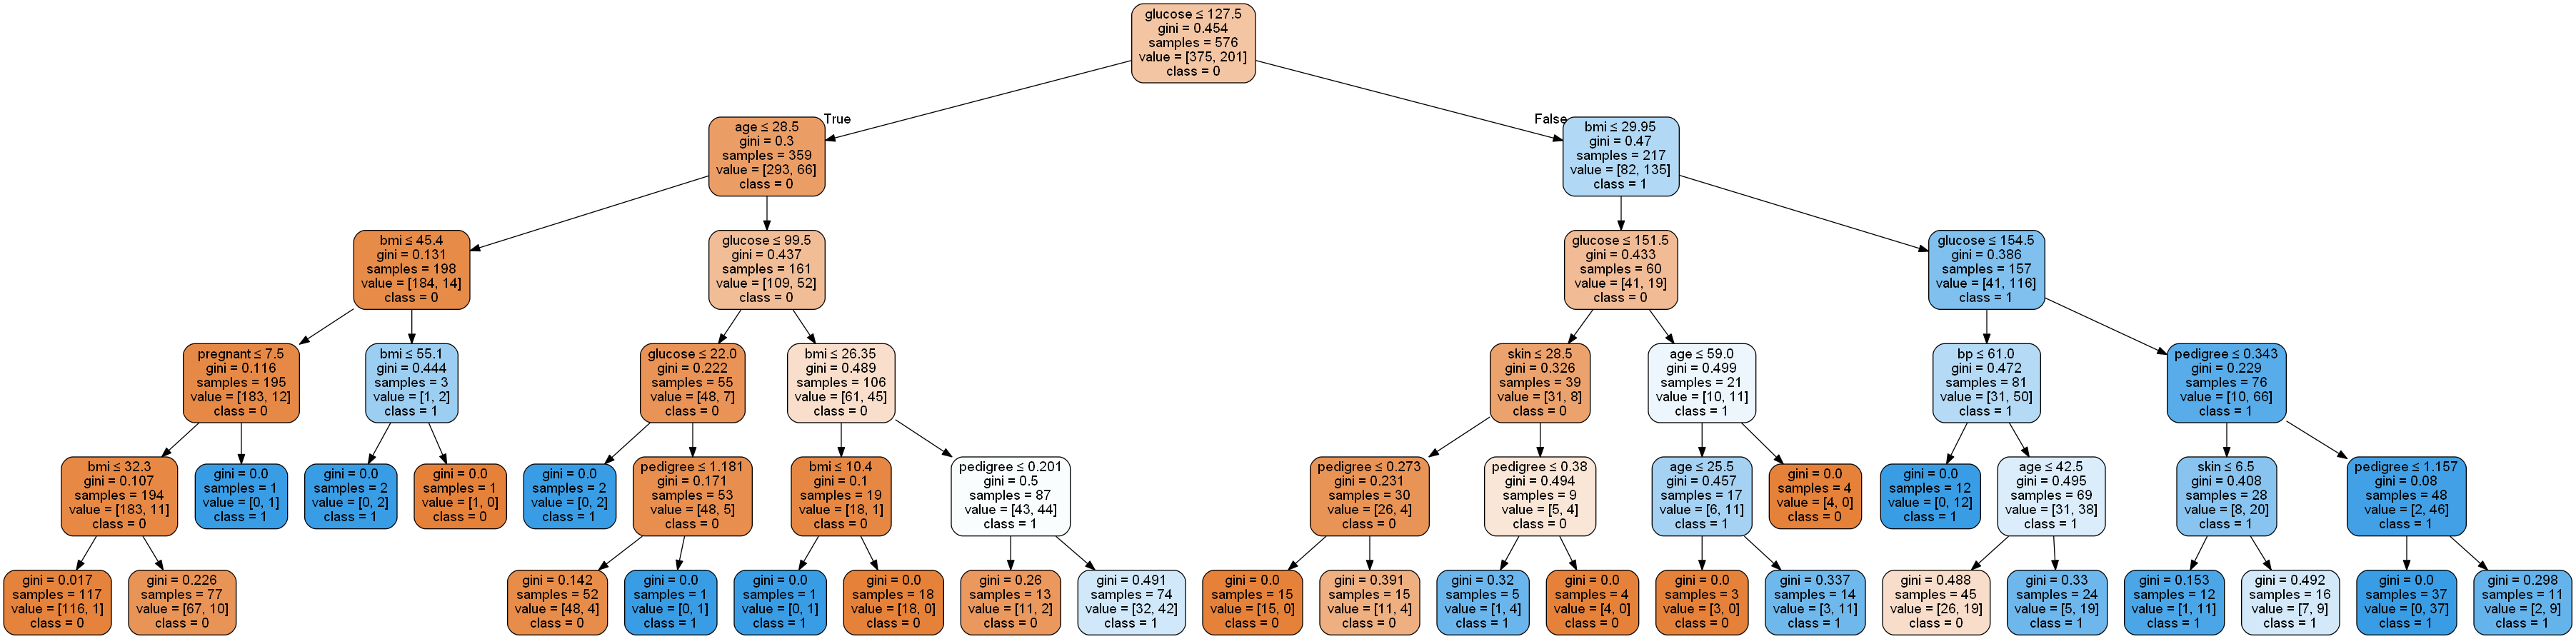

In [78]:
feature_names = col_names[:8]
target_names = ['0','1']
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, 
                class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/diabetes.png')
Image(graph.create_png())